In [2]:
#Riansyah Fazar Ramadhan - 5006201003 - Neural Networks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Inisiasi Data Point
X = np.array([[0,0],[2,0],
              [0,2],[2,2],
              [4,4],[6,4],
              [4,6],[6,6]
              ])
cluster_origin = np.array([[0,6], [3,6]], dtype=float)
iteration = 5
alpha = 0.5

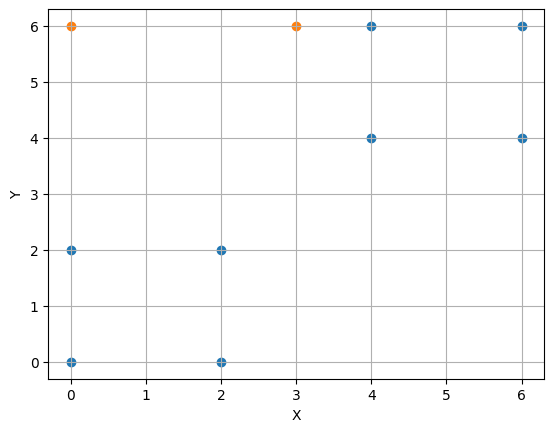

In [4]:
# Extract x and y coordinates from X
x_coords = X[:, 0]
y_coords = X[:, 1]
x_cluster = cluster_origin[:,0]
y_cluster = cluster_origin[:,1]

# Plot the points
plt.scatter(x_coords, y_coords)
plt.scatter(x_cluster, y_cluster)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')

# Show plot
plt.grid(True)
plt.show()

In [5]:
idx = []
iter_idx = []
alpha_idx = []
data_point = []
w1x = []
w1y = []
w2x = []
w2y = []
closest_centroid = []
c1_dist_change = []
c2_dist_change = []

In [6]:
def SOM(x, initial_centroids, num_iter, coef):
    centroids = initial_centroids.copy() #Digunakan agar tidak mengubah nilai initial centroid
    K = centroids.shape[0] #Mengambil dimensi centroid sebagai dasar iterasi
    n = 1 #Inisiasi nilai n
    iterasi = 0 #Inisiasi iterasi
    for i in range(num_iter):
    #For terluar untuk mencatat iterasi/perulangan setiap batch (Disebut sebagai iterasi)
        print(f"\nIterasi ke {i+1} / {num_iter}")

        iterasi += 1

        for j in range(x.shape[0]):
        #For kedua untuk mencatat iterasi setiap data point (Disebut sebagai step)
            idx.append(n)
            iter_idx.append(iterasi)
            alpha_idx.append(coef)
            data_point.append(X[j])
            w1x.append(centroids[0][0].copy())
            w1y.append(centroids[0][1].copy())
            w2x.append(centroids[1][0].copy())
            w2y.append(centroids[1][1].copy())
            print(f"\nStep {n}")

            n += 1
            distances = np.linalg.norm(x[j] - centroids, axis=1, ord=2) #Menghitung jarak data point menuju seluruh centroid
            closest_centroids_idx = np.argmin(distances) #Memilih centroid dengan jarak terdekat
            prev_centroids = centroids.copy() 

            print(f"\nJarak X{j+1} ke centroid terdekat (W{closest_centroids_idx+1}) = {distances[closest_centroids_idx]}")
            for k in range(K):
            #For ketiga untuk mengubah posisi centroid yang terdekat dengan data point 
                if k == closest_centroids_idx:
                    closest_centroid.append((closest_centroids_idx)+1)

                    centroids[k] += coef * (x[j] - centroids[k]) #Reposisi centroid baru berdasarkan learning rate alpha (coef)
                    dist_change = np.linalg.norm(centroids[k] - prev_centroids[k], ord=2) #Menghitung selisih jarak centroid lama dan baru

                    print(f"\nKoordinat W{k+1} baru = {centroids[k]}")
                    print(f"\nJarak W{k+1} ke W{k+1}` = {dist_change}")
                    
            c1_dist_change.append(np.linalg.norm(prev_centroids[0] - centroids[0]))
            c2_dist_change.append(np.linalg.norm(prev_centroids[1] - centroids[1]))
            
        coef = coef * 0.1 #Learning rate atau coef disesuaikan setelah satu iterasi selesai dilakukan
        
        print(f"Koordinat akhir W1 dan W2 setelah iterasi ke-{n-1}:")
        print(centroids)
    return centroids


Iterasi ke 1 / 5

Step 1

Jarak X1 ke centroid terdekat (W1) = 6.0

Koordinat W1 baru = [0. 3.]

Jarak W1 ke W1` = 3.0

Step 2

Jarak X2 ke centroid terdekat (W1) = 3.605551275463989

Koordinat W1 baru = [1.  1.5]

Jarak W1 ke W1` = 1.8027756377319946

Step 3

Jarak X3 ke centroid terdekat (W1) = 1.118033988749895

Koordinat W1 baru = [0.5  1.75]

Jarak W1 ke W1` = 0.5590169943749475

Step 4

Jarak X4 ke centroid terdekat (W1) = 1.5206906325745548

Koordinat W1 baru = [1.25  1.875]

Jarak W1 ke W1` = 0.7603453162872774

Step 5

Jarak X5 ke centroid terdekat (W2) = 2.23606797749979

Koordinat W2 baru = [3.5 5. ]

Jarak W2 ke W2` = 1.118033988749895

Step 6

Jarak X6 ke centroid terdekat (W2) = 2.692582403567252

Koordinat W2 baru = [4.75 4.5 ]

Jarak W2 ke W2` = 1.346291201783626

Step 7

Jarak X7 ke centroid terdekat (W2) = 1.6770509831248424

Koordinat W2 baru = [4.375 5.25 ]

Jarak W2 ke W2` = 0.8385254915624212

Step 8

Jarak X8 ke centroid terdekat (W2) = 1.7897276329095442

Koord

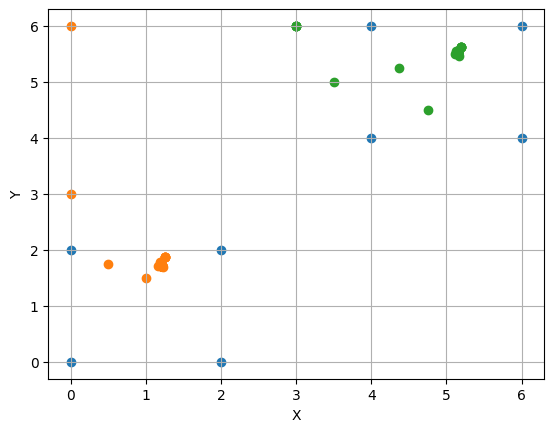

In [ ]:
results = SOM(X, cluster_origin, iteration, alpha)

x_coords = X[:, 0]
y_coords = X[:, 1]
w1 = np.array([[w1x,w1y]], dtype=float)
w2 = np.array([[w2x,w2y]], dtype=float)
x_1 = w1[:,0]
y_1 = w1[:,1]
x_2 = w2[:,0]
y_2 = w2[:,1]

plt.scatter(x_coords, y_coords)
plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)
plt.show()

In [ ]:
df_dict = {'No.': idx,
           'Iterasi': iter_idx,
           'X': data_point,
           'Alpha': alpha_idx,
           'W1x': w1x,
           'W1y': w1y,
           'W2x': w2x,
           'W2y': w2y,
           'Centroid Terdekat': closest_centroid,
           'Jarak W1 ke W1`': c1_dist_change,
           'Jarak W2 ke W2`': c2_dist_change,
           }
df = pd.DataFrame(df_dict)
df

,No.,Iterasi,X,Alpha,W1x,W1y,W2x,W2y,Centroid Terdekat,Jarak W1 ke W1`,Jarak W2 ke W2`
0,1,1,"[0, 0]",0.50000,0.000000,6.000000,3.000000,6.000000,1,3.000000,0.000000
1,2,1,"[2, 0]",0.50000,0.000000,3.000000,3.000000,6.000000,1,1.802776,0.000000
2,3,1,"[0, 2]",0.50000,1.000000,1.500000,3.000000,6.000000,1,0.559017,0.000000
3,4,1,"[2, 2]",0.50000,0.500000,1.750000,3.000000,6.000000,1,0.760345,0.000000
4,5,1,"[4, 4]",0.50000,1.250000,1.875000,3.000000,6.000000,2,0.000000,1.118034
5,6,1,"[6, 4]",0.50000,1.250000,1.875000,3.500000,5.000000,2,0.000000,1.346291
6,7,1,"[4, 6]",0.50000,1.250000,1.875000,4.750000,4.500000,2,0.000000,0.838525
7,8,1,"[6, 6]",0.50000,1.250000,1.875000,4.375000,5.250000,2,0.000000,0.894864
8,9,2,"[0, 0]",0.05000,1.250000,1.875000,5.187500,5.625000,1,0.112673,0.000000
9,10,2,"[2, 0]",0.05000,1.187500,1.781250,5.187500,5.625000,1,0.097890,0.000000
